In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user = 'postgres'
password = 'postgresql07'
host = '192.168.31.226'       # or your IP
port = '5432'
database = 'postgres'
table = 'news_data'

# SQLAlchemy connection string
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')


In [4]:
query = "select * FROM cleaned_news_data_api ";
df = pd.read_sql(query, engine)

In [5]:
df.head()


,source,author,title,description,url,publishedat,published_date,published_time,published_hour,domain,title_length,description_length,day_of_week
0,BusinessLine,AP,New disputes emerge ahead of US-China trade ta...,US-China trade talks in London address dispute...,https://www.thehindubusinessline.com/news/worl...,2025-06-09 03:49:40,2025-06-09,03:49:40,3,www.thehindubusinessline.com,59,114,Monday
1,The Times of India,Reuters,"China's May exports miss expectations, imports...",China's exports saw a 4.8% year-on-year increa...,https://economictimes.indiatimes.com/news/inte...,2025-06-09 03:35:42,2025-06-09,03:35:42,3,economictimes.indiatimes.com,61,260,Monday
2,Digital Journal,AFP,NATO learns as Ukraine’s ‘creativity’ changes ...,"Ukraine’s “creativity”, including its massive ...",https://www.digitaljournal.com/world/nato-lear...,2025-06-09 03:28:23,2025-06-09,03:28:23,3,www.digitaljournal.com,57,260,Monday
3,The Straits Times,NaN,Meta in talks for Scale AI investment that cou...,This would be Meta’s biggest external AI inves...,https://www.straitstimes.com/business/companie...,2025-06-09 03:24:28,2025-06-09,03:24:28,3,www.straitstimes.com,66,147,Monday
4,The Times of India,ET Online,Bengaluru tech drama: How an ex-employee sabot...,"Kirana-Pro, a Bengaluru-based startup, experie...",https://economictimes.indiatimes.com/magazines...,2025-06-09 03:12:07,2025-06-09,03:12:07,3,economictimes.indiatimes.com,79,260,Monday


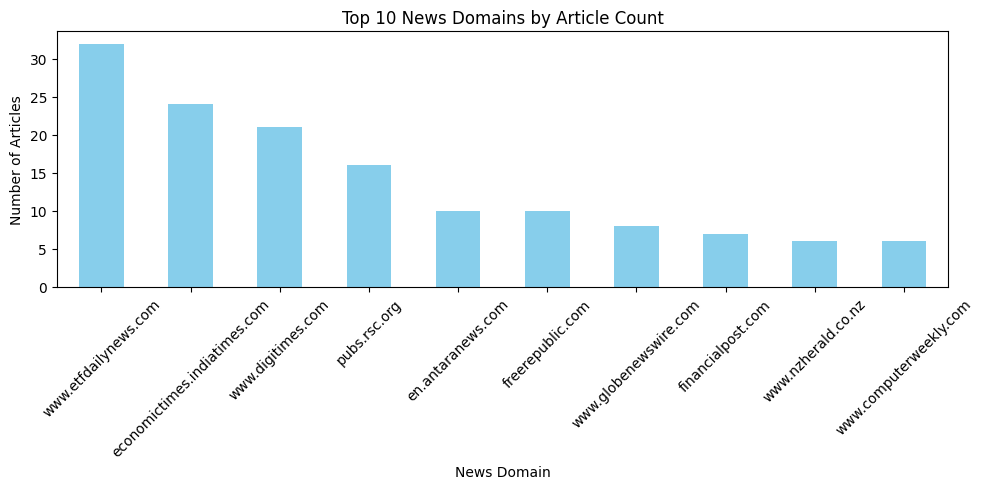

In [6]:
top_domains = df['domain'].value_counts().head(10)


plt.figure(figsize=(10, 5))
top_domains.plot(kind='bar', color='skyblue')
plt.title('Top 10 News Domains by Article Count')
plt.xlabel('News Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


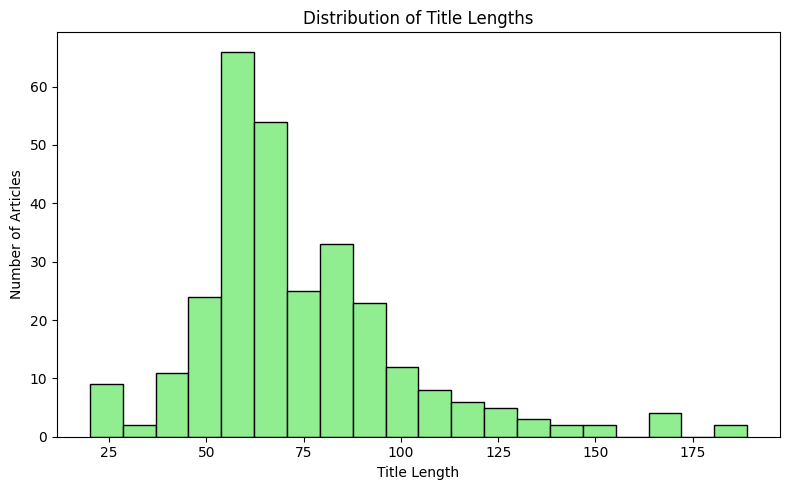

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df['title_length'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()


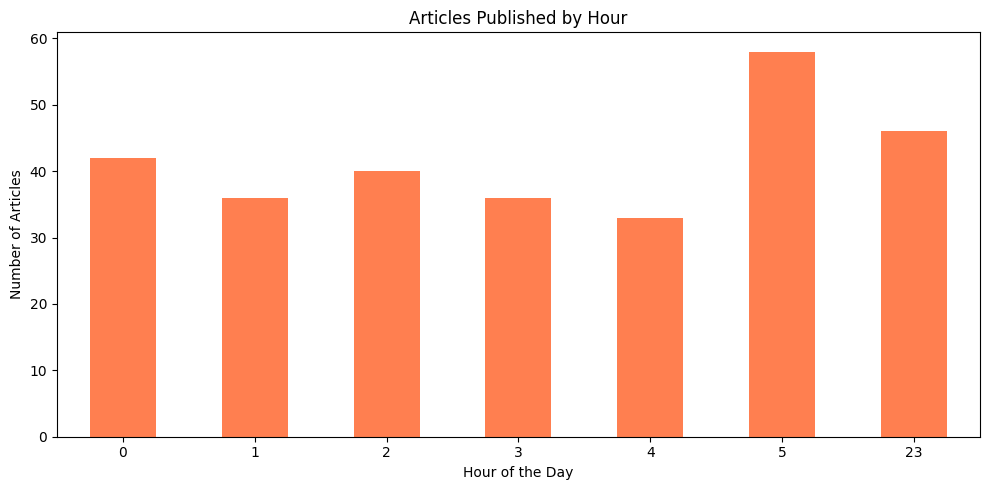

In [8]:
df['hour'] = pd.to_datetime(df['publishedat']).dt.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='coral')
plt.title('Articles Published by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


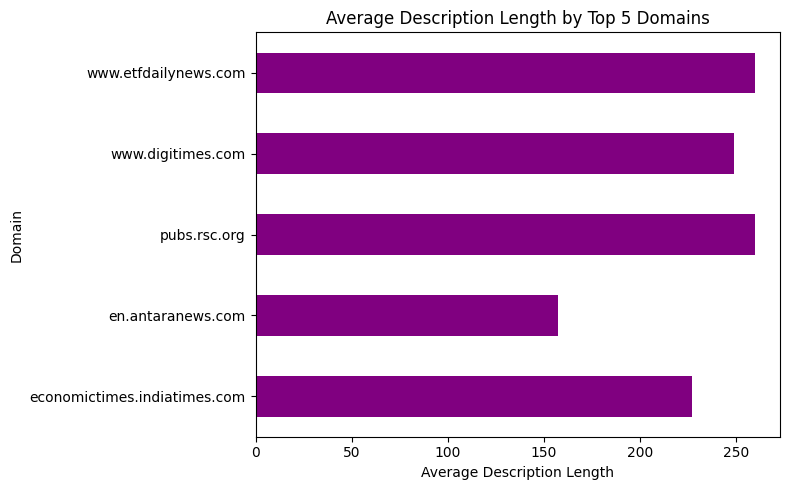

In [9]:
top5 = df['domain'].value_counts().head(5).index
avg_desc_length = df[df['domain'].isin(top5)].groupby('domain')['description_length'].mean()

plt.figure(figsize=(8, 5))
avg_desc_length.plot(kind='barh', color='purple')
plt.title('Average Description Length by Top 5 Domains')
plt.xlabel('Average Description Length')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()


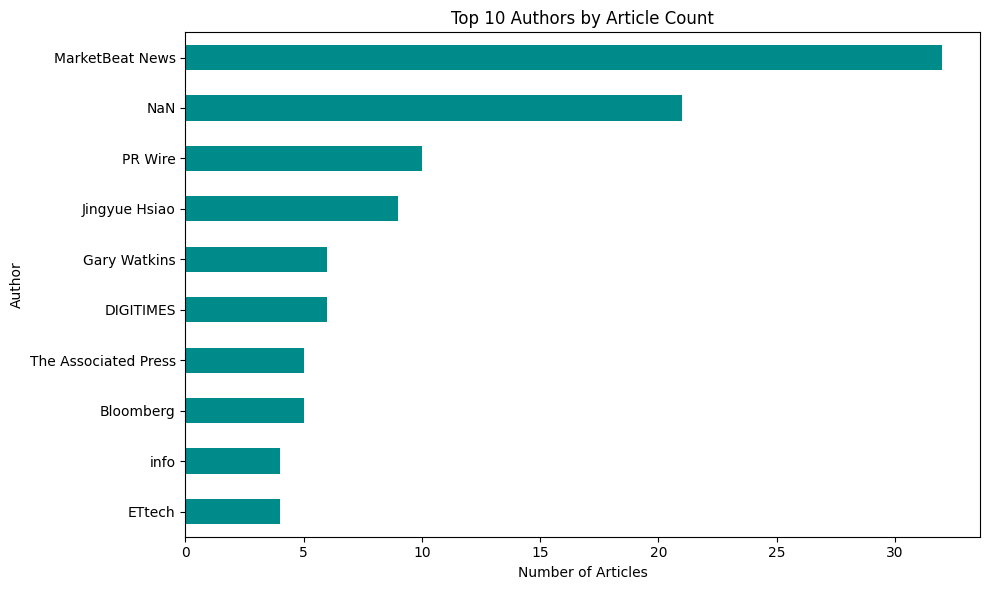

In [10]:
top_authors = df['author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_authors.plot(kind='barh', color='darkcyan')
plt.title('Top 10 Authors by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

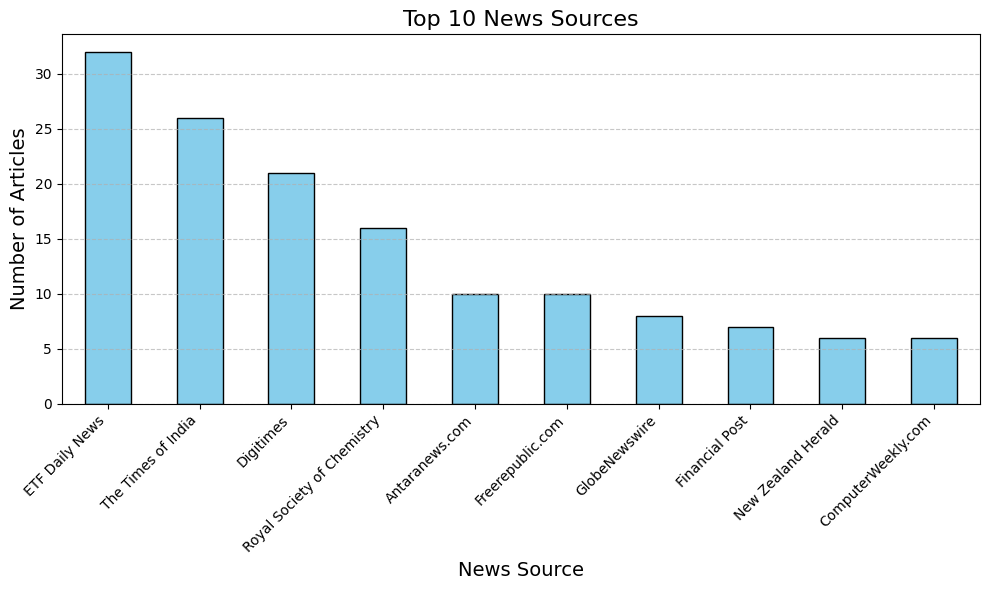

In [11]:
top_sources = df['source'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10,6))
top_sources.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 News Sources', fontsize=16)
plt.xlabel('News Source', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()